# Imports and installs

In [ ]:
import clustering
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings("ignore")

# Load data

In [ ]:
df = clustering.load_df()

In [ ]:
print(df)

                     date                                           headline  \
0     2023-09-07 00:00:00    Freie Wähler BaWü: Imageschaden durch Aiwanger?   
1     2023-09-07 00:00:00  Bundesverwaltungsgericht : Anlasslose Vorratsd...   
2     2023-09-07 00:00:00  Innenausschuss zu Schönbohm-Absetzung: Faeser ...   
3     2023-09-07 00:00:00  Sparmaßnahmen im Bildungsbereich: "Eine absolu...   
4     2023-09-07 00:00:00  Zentralrat der Juden: Aiwanger und Schuster wo...   
...                   ...                                                ...   
3377  2023-09-07 00:00:00  Was Aiwanger auf Söders 25 Fragen geantwortet hat   
3378  2023-09-07 00:00:00                        Eine verhängnisvolle Affäre   
3379  2023-09-07 00:00:00          Warum das Flugblatt keine Jugendsünde ist   
3380  2023-09-07 00:00:00  Aiwanger hat Fragen der CSU zu Flugblatt beant...   
3381  2023-09-07 00:00:00                   Als äußerst rechts in Erinnerung   

           paper  
0     tagesschau  
1

# General Preprocessing

In [ ]:
df['headline_prep'] = df['headline'].apply(clustering.preprocess_text)
df.dropna(axis=0, how='any', inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-8-ea1bf096b350>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['headline_prep'] = df['headline'].apply(preprocess_text)
<ipython-input-8-ea1bf096b350>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, how='any', inplace=True)


In [ ]:
df

,date,headline,paper,headline_prep
0,2023-09-07 00:00:00,Freie Wähler BaWü: Imageschaden durch Aiwanger?,tagesschau,Freie Wähler BaWü Imageschaden Aiwanger
1,2023-09-07 00:00:00,Bundesverwaltungsgericht : Anlasslose Vorratsd...,tagesschau,Bundesverwaltungsgericht Anlasslose Vorratsdat...
2,2023-09-07 00:00:00,Innenausschuss zu Schönbohm-Absetzung: Faeser ...,tagesschau,Innenausschuss Schönbohm Absetzung Faeser fehl...
3,2023-09-07 00:00:00,"Sparmaßnahmen im Bildungsbereich: ""Eine absolu...",tagesschau,Sparmaßnahmen Bildungsbereich absolut falsche ...
4,2023-09-07 00:00:00,Zentralrat der Juden: Aiwanger und Schuster wo...,tagesschau,Zentralrat Juden Aiwanger Schuster treffen
...,...,...,...,...
3377,2023-09-07 00:00:00,Was Aiwanger auf Söders 25 Fragen geantwortet hat,sz,Aiwanger Söders Fragen geantwortet
3378,2023-09-07 00:00:00,Eine verhängnisvolle Affäre,sz,verhängnisvolle Affäre
3379,2023-09-07 00:00:00,Warum das Flugblatt keine Jugendsünde ist,sz,Warum Flugblatt Jugendsünde
3380,2023-09-07 00:00:00,Aiwanger hat Fragen der CSU zu Flugblatt beant...,sz,Aiwanger Fragen CSU Flugblatt beantwortet


# Clustering

In [ ]:
# Load the SentenceTransformer model
model = SentenceTransformer('T-Systems-onsite/cross-en-de-roberta-sentence-transformer')

# Encode headlines using the SentenceTransformer model
headline_embeddings = clustering.encode_headlines(df['headline_prep'].tolist(), model)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
clustering.compute_silhouette_per_cluster_number(10,60, headline_embeddings)

The average silhouette score for 10 is: 0.03608573
The average silhouette score for 11 is: 0.033065423
The average silhouette score for 12 is: 0.03535672
The average silhouette score for 13 is: 0.039761383
The average silhouette score for 14 is: 0.03769837
The average silhouette score for 15 is: 0.035998113
The average silhouette score for 16 is: 0.040628657
The average silhouette score for 17 is: 0.035440996
The average silhouette score for 18 is: 0.040859144
The average silhouette score for 19 is: 0.038736857
The average silhouette score for 20 is: 0.03889412
The average silhouette score for 21 is: 0.03429653
The average silhouette score for 22 is: 0.04184022
The average silhouette score for 23 is: 0.038130827
The average silhouette score for 24 is: 0.04158918
The average silhouette score for 25 is: 0.040356234
The average silhouette score for 26 is: 0.040713213
The average silhouette score for 27 is: 0.04004173
The average silhouette score for 28 is: 0.041285913
The average silhouet

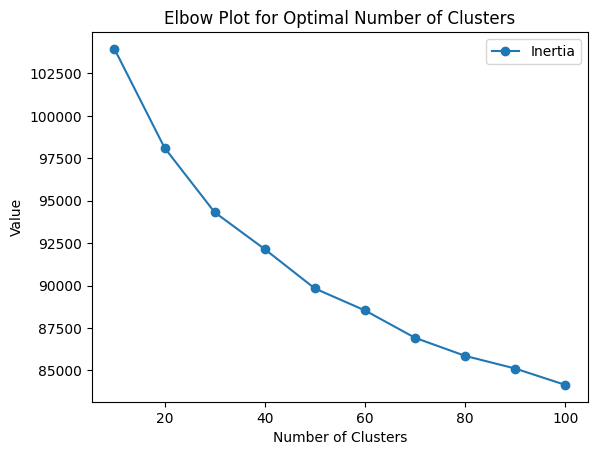

In [ ]:
# Set the range of number of clusters to try
min_clusters = 10
max_clusters = 100  # You can adjust this range based on your scenario

clustering.compute_elbow_plot(min_clusters, max_clusters, headline_embeddings) 


In [ ]:
# Perform K-means clustering
num_clusters = 50  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(headline_embeddings)

# Assign cluster labels to the DataFrame
df['cluster_label'] = kmeans.labels_

# Reduce dimensionality of headline embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42,  n_iter = 3000)
tsne_result = tsne.fit_transform(headline_embeddings)

# Add t-SNE components to DataFrame
df['tsne_x'] = tsne_result[:, 0]
df['tsne_y'] = tsne_result[:, 1]

# Plot the clustered data with Plotly
fig = px.scatter(df, x='tsne_x', y='tsne_y', color='cluster_label', hover_data={'headline': True},
                 title='Clustering Result based on Semantic Embeddings (t-SNE)',
                 labels={'tsne_x': 't-SNE Dimension 1', 'tsne_y': 't-SNE Dimension 2'},
                 color_continuous_scale='Viridis')
fig.show()


In [ ]:
# Define the cluster names and their corresponding labels
cluster_names = {
    26: 'Leaflet Affair',
    19: 'Legal matters',
    45: 'miscellaneous',
    44: 'Tax',
    18: 'Election campaign Bavaria',
    15: 'EU',
    29: 'Health and medicine',
    34: 'miscellaneous',
    5: 'migration',
    3: 'AfD',
    39: 'Foreign policy',
    24: 'migration',
    21: 'SPD',
    17: 'housing crisis and heating law',
    32: 'Scholz decision making',
    16: 'basic child support',
    4: 'Deutschland',
    40: 'refugees',
    20: 'AfD',
    37: 'Dissatisfaction with current state',
    48: 'right-wing extremism',
    30: 'miscellaneous',
    33: 'miscellaneous',
    13: 'CDU',
    35: 'Ukraine',
    14: 'Grüne',
    42: 'miscellaneous',
    31: 'climate',
    47: 'migration',
    22: 'migration',
    46: 'industry',
    27: 'Merz',
    41: 'Berlin',
    2: 'asylum',
    6: 'miscellaneous',
    9: 'Faeser',
    10: 'AfD',
    43: 'border control',
    38: 'CSU',
    11: 'Söder',
    12: 'climate',
    8: 'Hessen',
    28: 'Merz on asylum',
    49: 'surveys',
    1: 'Chrupalla',
    23: 'miscellaneous',
    0: 'right-wing extremism',
    7: 'Ampel',
    25: 'government debt',
    36: 'FDP'
}


# Perform K-means clustering
num_clusters = 50  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(headline_embeddings)

# Assign cluster labels to the DataFrame
df['cluster_label'] = kmeans.labels_
# Create a DataFrame for cluster names
cluster_names_df = pd.DataFrame(list(cluster_names.items()), columns=['cluster_label', 'Cluster Name'])

# Merge cluster names with the main DataFrame on 'cluster_label'
df = df.merge(cluster_names_df, on='cluster_label', how='left')

# Reduce dimensionality of headline embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42,  n_iter=3000)
tsne_result = tsne.fit_transform(headline_embeddings)

# Add t-SNE components to DataFrame
df['tsne_x'] = tsne_result[:, 0]
df['tsne_y'] = tsne_result[:, 1]

# Plot the clustered data with Plotly
fig = px.scatter(df, x='tsne_x', y='tsne_y', color='Cluster Name', hover_data={'headline': True, 'Cluster Name': True},
                 title='Clustering Result based on Semantic Embeddings (t-SNE)',
                 labels={'tsne_x': 't-SNE Dimension 1', 'tsne_y': 't-SNE Dimension 2'},
                 color_continuous_scale='Viridis')
fig.show()


In [ ]:
# Count the number of headlines in each cluster
cluster_sizes = df['Cluster Name'].value_counts().sort_index()

# Print the cluster sizes with their corresponding cluster names
print("Cluster Sizes:")
for cluster_name, size in cluster_sizes.items():
    print(f"Cluster '{cluster_name}': {size}")


Cluster Sizes:
Cluster 'AfD': 160
Cluster 'Ampel': 68
Cluster 'Berlin': 49
Cluster 'CDU': 96
Cluster 'CSU': 26
Cluster 'Chrupalla': 12
Cluster 'Deutschland': 144
Cluster 'Dissatisfaction with current state': 74
Cluster 'EU': 51
Cluster 'Election campaign Bavaria': 79
Cluster 'FDP': 22
Cluster 'Faeser': 67
Cluster 'Foreign policy': 57
Cluster 'Grüne': 53
Cluster 'Health and medicine': 24
Cluster 'Hessen': 28
Cluster 'Leaflet Affair': 51
Cluster 'Legal matters': 72
Cluster 'Merz': 14
Cluster 'Merz on asylum': 53
Cluster 'SPD': 76
Cluster 'Scholz decision making': 68
Cluster 'Söder': 36
Cluster 'Tax': 67
Cluster 'Ukraine': 42
Cluster 'asylum': 56
Cluster 'basic child support': 36
Cluster 'border control': 38
Cluster 'climate': 90
Cluster 'government debt': 15
Cluster 'housing crisis and heating law': 47
Cluster 'industry': 38
Cluster 'migration': 181
Cluster 'miscellaneous': 748
Cluster 'refugees': 49
Cluster 'right-wing extremism': 54
Cluster 'surveys': 84


In [ ]:
clustered_headlines = {}  # Dictionary to store headlines grouped by cluster label

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    cluster_label = row['cluster_label']
    headline = row['headline']

    # Check if cluster label already exists in dictionary
    if cluster_label in clustered_headlines:
        clustered_headlines[cluster_label].append(headline)
    else:
        clustered_headlines[cluster_label] = [headline]

# Print headlines grouped by cluster label
for cluster_label, headlines in clustered_headlines.items():
    print(f"Cluster {cluster_label}:")
    for headline in headlines:
        print(headline)
    print()


Cluster 26:
Freie Wähler BaWü: Imageschaden durch Aiwanger?
Zentralrat der Juden: Aiwanger und Schuster wollen sich treffen
Gespräche mit Freie-Wähler-Chef: Jüdische Gemeinden zu Treffen mit Aiwanger uneins
Nach Treffen wegen Flugblatt-Affäre: Schuster hält an Aiwanger-Kritik fest
Juristisches Nachspiel im Fall Aiwanger?
Aiwanger profitiert von Flugblatt-Affäre
Aiwangers Schule und das Recht
Antrag auf Entlassung Aiwangers scheitert
"Herr Aiwanger, was verstehen Sie unter Reue und Demut?"
Bayerns Landtag grillt Hubert Aiwanger
Warum legt Aiwanger trotz Auschwitz-Flugblatt zu?
Autobosse schwänzen Aiwanger-Empfang
Verspielt Söder mit seiner Aiwanger-Treue die Kanzlerschaft?
Jetzt knöpft sich Iris Berben Aiwanger und Söder vor
Wiesn-Streit wegen Aiwanger eskaliert
So stark könnte die Aiwanger-Partei werden!
Aiwanger träumt von Bundespolitik
Krass, wie stark Aiwanger plötzlich ist!
"Das ist ein Widerspruch, aber Aiwanger bekommt das hin"
Die CSU-Verteidiger Aiwangers tun sich ebenso schwer

In [ ]:
from collections import Counter

# Define a function to get the most frequent words in each cluster
def get_cluster_keywords(cluster_headlines):
    all_words = ' '.join(cluster_headlines).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(5)  # Adjust the number of keywords as needed

# Dictionary to store cluster labels
cluster_labels = {}

# Iterate through each cluster
for cluster_label, headlines in clustered_headlines.items():
    # Get the most frequent words in the cluster
    cluster_keywords = get_cluster_keywords(headlines)
    # Use the most frequent words as the cluster label
    cluster_labels[cluster_label] = ' '.join([word for word, _ in cluster_keywords])

# Print cluster labels
for cluster_label, label in cluster_labels.items():
    print(f"Cluster {cluster_label}: {label}")


Cluster 26: Aiwanger Flugblatt Affäre Aiwangers Schuster
Cluster 19: wegen BND fordert Regeln NRW
Cluster 45: Faeser Schönbohm Kanzler Schröder Innenausschuss
Cluster 44: Bürgergeld Steuersenkung Thüringer Seenotretter Kabinett
Cluster 18: Bayern Bayerns Landtagswahl AfD Söder
Cluster 15: EU Euro Brüssel Asylreform Scholz
Cluster 29: Lauterbach Long Covid Corona Lauterbachs
Cluster 32: Scholz Olaf Pakt Augenklappe Kanzler
Cluster 34: mehr Bundesregierung Generation sinkt Menschen
Cluster 5: müssen bleiben zurück Land verlassen
Cluster 39: Baerbock Kubickis Aserbaidschan verteidigt Björn
Cluster 24: Deutschland Zuwanderung EU Migration Deutschlandpakt
Cluster 21: SPD Hessen Grüne Faeser Schröder
Cluster 17: Heizungsgesetz Bundestag Habeck beschließt Heiz
Cluster 16: Kindergrundsicherung Kinder Paus Kabinett FDP
Cluster 4: Deutschland Deutsche deutsche Deutschlands mehr
Cluster 40: Flüchtlinge Geflüchtete Faeser Flüchtlingsheim Obergrenze
Cluster 20: AfD Nordhausen Wahl Oberbürgermeister

In [ ]:
df.to_csv('clustering.csv', index=False)